In [18]:
import os
if not os.path.exists('./Workspace/log'):
    os.makedirs('./Workspace/log')
def createLog(log, type):
    with open('./Workspace/log/%s.txt' % type, 'a') as f:
        f.write(log+'\n')
createLog(time.strftime('%Y%m%d %X'),'test')

In [19]:
import time
print time.strftime('%Y%m%d')

20160518


In [6]:
dic = {'a':1,'b':2}
c = None
dic['c']=c
print dic

{'a': 1, 'c': None, 'b': 2}


In [5]:
import copy
a=[]
b={}
for x in xrange(0,2):
    b['v'] = x
    a.append(b)
print a

[{'v': 1}, {'v': 1}]


In [23]:
import os
import re
import json
blogs = {}
path = '/Users/fan/PycharmProjects/ETL/GuoWeiShiuan20161523/data/270000_280000/{}'
for fname in os.listdir(path.format('blog/')):
    if re.search('.*ifood.*',fname):
        with open(path.format('blog/')+fname, 'r') as f:
            jBlog = json.load(f)['blog']
            for ele in jBlog:
                if ele['_id'] not in blogs:
                    blogs[ele['_id']] = ele
                elif ele['timestamp']>blogs['_id']['timestamp']:
                    blogs[ele['_id']] = ele

OMAYA春川炒雞牽絲起士鍋海鮮煎餅部隊鍋西門町店 @ 訪羽玩食趣 


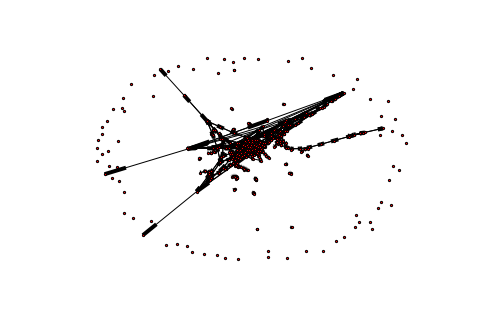

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import os
import re
import json
import time


def readData(path,key):
    data = {}
    for fname in os.listdir(path):
        if re.search('.*ifood.*',fname):
            with open(path+'/'+fname, 'r') as f:
                jd = json.load(f)[key]
                for ele in jd:
                    if ele['_id'] not in data:
                        data[ele['_id']] = ele
                    elif ele['timestamp'] > data[ele['_id']]['timestamp']:
                        data[ele['_id']] = ele
    return data


path = '/Users/fan/PycharmProjects/ETL/GuoWeiShiuan20161523/data/270000_280000/user'
key = 'user'
user = readData(path, key)
dg = nx.DiGraph()
for id in user:
    dg.add_node(id)
    for fid in user[id]['fans_id_list']:
        if user.get(fid):
            dg.add_weighted_edges_from([(fid, id, user[fid]['follower_cnt'])])
indg = dg.in_degree(weight='weight')
outdg = dg.in_degree(weight='weight')
#indg = dg.in_degree()
#outdg = dg.in_degree()
[dg.remove_node(ele) for ele in indg if indg[ele] < 100]
pos = nx.spring_layout(dg)
nx.draw(dg, pos, node_size=5)



id: a | value: 200 | follower: b,c,d | in-degree: 300
id: b | value: 100 | follower: c | in-degree: 150
id: c | value: 150 | follower: b,a | in-degree: 300
id: d | value: 50 | follower: b,e | in-degree: 150
id: e | value: 50 | follower: a | in-degree: 200
['a', 'c', 'b']


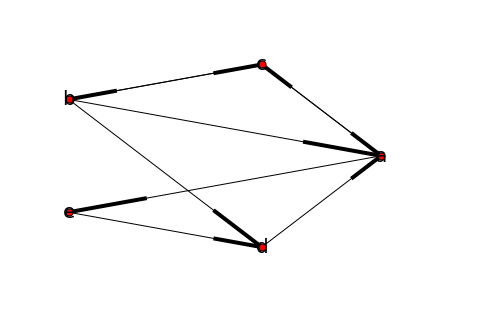

In [21]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
dg = nx.DiGraph()
label = {}
id = [{'id':'a', 'follow':['b','c','d'], 'value':200}, {'id':'b', 'follow':['c'], 'value':100}, {'id':'c', 'follow':['b','a'], 'value':150}, {'id':'d', 'follow':['b','e'], 'value':50}, {'id':'e', 'follow':['a'], 'value':50}]
for i in id:
    dg.add_node(i['id'], value=i['value']) 
    label[i['id']] = i['id']
for i in id:
    for f in i['follow']:
        dg.add_weighted_edges_from([(f, i['id'], dg.node[f]['value'])])
for node in id:
    print 'id: %s | value: %d | follower: %s | in-degree: %d' %(node['id'],dg.node[node['id']]['value'],','.join(node['follow']),dg.in_degree(node['id'],weight='weight'))
d =  dg.in_degree(weight='weight').values()
pos = nx.shell_layout(dg)
nx.draw(dg, pos, with_labels=True, node_size=[v*10 for v in d], font_size=20)
#nx.draw(dg, pos, with_labels=True, node_size=50, font_size=20)
print nx.k_core(dg, k=3).nodes()

In [63]:
import os
import re
import json
import time


#讀資料去除重複
def readData(path,key):
    data = {}
    for fname in os.listdir(path):
        if re.search('.*ifood.*',fname):
            with open(path+'/'+fname, 'r') as f:
                jd = json.load(f)[key]
                for ele in jd:
                    if ele['_id'] not in data:
                        data[ele['_id']] = ele
                    elif ele['timestamp'] > data[ele['_id']]['timestamp']:
                        data[ele['_id']] = ele
    return data


path = '/Users/fan/PycharmProjects/ETL/IFOOD/{}'
user = readData(path.format('user'), 'user')
blog = readData(path.format('blog'), 'blog')
restaurant = readData(path.format('restaurant'), 'restaurant')
# 統計域名
typeDict = {}
for b in blog.values():
    if b['blog_type'] not in typeDict:
        typeDict[b['blog_type']] = 1
    else:
        typeDict[b['blog_type']] += 1
# 去除pixnet
noPixnet = [ele for ele in typeDict.keys() if 'pixnet' not in ele]

# 排除自推，計算每個人喜歡特定人文章的數量
#def countAuthor(dict, user, blog, collection):
#    for bg in user[collection]:
#        if bg in blog and blog[bg]['author_id'] not in like and blog[bg]['author_id'] != user['_id']:
#            dict[blog[bg]['author_id']] = 1
#        elif bg in blog and blog[bg]['author_id'] in like and blog[bg]['author_id'] != user['_id']:
#            dict[blog[bg]['author_id']] += 1
#    return dict

# 包含自推，計算每個人喜歡特定人文章的數量
def countAuthor(dict, user, blog, collection):
    for bg in user[collection]:
        if bg in blog and blog[bg]['author_id'] not in like:
            dict[blog[bg]['author_id']] = 1
        elif bg in blog and blog[bg]['author_id'] in like:
            dict[blog[bg]['author_id']] += 1
    return dict

# 填入author
for u in user:
    for bg in user[u]['blog_id_list']:
        if blog[bg]:
            blog[bg]['author_id'] = u
        else:
            blog[bg]['author_id'] = None

# 計算喜歡次數            
for us in user:
    like = {}
    try:
        like = countAuthor(like, user[us], blog, 'collection_blog_list')
        like = countAuthor(like, user[us], blog, 'recommendation_blog_list')
        user[us]['like'] = like
    except KeyError:
        user[us]['like'] ={}
print len(user)
print len(blog)
print len(restaurant)
#for domain in noPixnet:
#    print domain
    





294634
72838
27912


In [ ]:
count = 0
for ele in user.values():
    for k in ele['like'].values():
        if k >= 100 and len(ele['like'].values()) >=300:
            print ele['_id']
            print '====================================================================================================================='
            print ele['like']
            print '====================================================================================================================='
            count += 1
            break
print count

In [13]:
with open('./TWD97/restlatlng.txt', 'w') as f:
    for r in restaurant.values():
        f.write('%s,%s\n' %(str(r['lat']), str(r['lng'])))

In [64]:
import networkx as nx
dg = nx.DiGraph()
personalization = {}
for id in user:
    personalization[id] = float(user[id]['follower_cnt'])/len(user)
    dg.add_node(id)
    normalized = sum(user[id]['like'].values())
    for auth in user[id]['like']:
        if user.get(auth):
            w = user[id]['like'][auth]
            dg.add_weighted_edges_from([(id, auth, float(w)/normalized)])


In [65]:
[dg.remove_node(ele) for ele in dg.nodes() if dg.in_degree(ele) ==0 and dg.out_degree(ele) == 0]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [66]:
import operator
pr = nx.pagerank(dg, personalization = personalization, weight = 'weight')
sortedPr = sorted(pr.iteritems(),key=operator.itemgetter(1),reverse=True)

In [67]:
for ele in sortedPr[0:100]:
    print user[ele[0]]['_id'], user[ele[0]]['display_name'], user[ele[0]]['follower_cnt'], dg.in_degree(ele[0]), ele[1]

53bdf3bdd4fdab213072997b 斑比Banbi 15832 32070 0.0290350214364
54ac7d74d4fdab77377e1ca2 nelly 12627 18568 0.0263934735324
54ac229cd4fdab6eca38e0ea 愛吃鬼芸芸 24300 23752 0.0201056641833
539fe1fe6f345b319c640474 雪嫩 Shannon 11266 17066 0.0180830479218
541f7f44d4fdab26b9209927 Yuki's Life 10689 30576 0.0144428513888
53a3c2666f345b4fadc684ad 心心❤ 12410 26123 0.0141137987638
54cd75f22756dd5b7cf0d935 爆肝護士 7001 19616 0.013401794422
53af0b6ad4fdab13bc255e05 水晶安蹄 4774 22466 0.012671263914
54d340512756dd727e83dbf8 花露露 7133 13305 0.0124653487449
54637e1cd4fdab447a817870 陳小可 5236 17088 0.0123658607118
53a466a76f345b73b0ed059a 周花花，甲飽沒 17941 35591 0.011563743283
54e41f9a2756dd560a9c0203 Nash，神之領域 3550 20708 0.0114903807843
53b01f89d4fdab1e36dd2b22 強生&小吠 5101 12350 0.0113964624443
550c34a92756dd0a2eb38782 艾布蕾 5592 12966 0.0112863661196
550acf1b2756dd02c8850366 捲捲和土豆拿鐵 6086 13971 0.01075869833
53c57e5cd4fdab1392db6ccd 阿mon 9390 18689 0.0106395340986
550a8d632756dd714849f815 大口老師 3303 15131 0.00988497937494
54

In [80]:
import re
s = ' 123 '
print re.search(' .* ',s).group(0)

 123 


In [94]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('http://www.ptrtour.com.tw/web_3/content_show_sql_detail.asp?travel_no=NGO05CX160605A')
res.encoding = 'big5'
soup = bs(res.text)
for t in soup.select('.day_title'):
    #print repr(t.text)
    print re.search('\r\n.+ ',t.text).group(0)


    桃園國際機場／名古屋中部國際機場∼伊勢灣海上人工島、保護環境之設計、行經東海北陸自行車道∼立山黑部之旅就此展開－【勝山】－ 

    勝山－【合掌村】∼世界文化遺產、春光明媚世外桃源、罕見精湛造屋技術－【飛驒高山上三之町古街】∼低調奢華木造宅、江戶風情古街道、工藝藏寶庫－【上高地】∼自然瑰寶保護區、河童橋展望穗高連峰、明神嶽、梓川、日本阿爾卑斯山環抱仙履之地－【長野∼芬多精森林浴、嚴選精製料理、溫泉露天風呂】－    

    長野－【黑部立山∼多段式登山工具飽覽美景】∼『雪壁漫步：4月16日∼6月22日限定』∼人間絕頂幻境∼黑部大壩世紀鉅作∼日本第一空中索道∼大觀峰、遊覽北阿爾卑斯山脈、名山連峰絕景∼日本落差第一稱名瀑布∼森之巨人百選立山杉∼美女平原生林∼日本三大靈山－【福井∼幸福山海珍味、季節限定食材、美肌溫泉舒壓風呂】－    

    福井－【安田魚板】－美味竹輪燒＆魚板麵製作體驗－【氣比神宮】∼『七尊祭神、長壽之水、芭蕉之碑、朱紅木造大鳥居』∼越前第一神宮、名望神社開運除厄－【昆布館】∼品嚐各式昆布美食、百種獨家昆布產品－【免稅店】∼精挑細選伴手禮、婆婆媽媽大小包－【名古屋】∼水色宙船天空之城OASIS21、銀河廣場、地下購物商店街、時尚名品大道、三越百貨、名古屋美食蒐羅網－    

    


In [107]:
import requests
from bs4 import BeautifulSoup as bs

def removePunctuation(source):
    xx = u"([^-:a-zA-Z0-9\u4e00-\u9fff]+)"
    s = re.sub(xx,' ',source)
    return s

res = requests.get('http://www.ptrtour.com.tw/web_3/content_show_sql_detail.asp?travel_no=NGO05CX160605A')
res.encoding = 'big5'
soup = bs(res.text)
for t in soup.select('.day_title'):
    print removePunctuation(t.text).strip()

桃園國際機場 名古屋中部國際機場 伊勢灣海上人工島 保護環境之設計 行經東海北陸自行車道 立山黑部之旅就此展開 勝山 TPE NGO CX530 11:45 15:40
勝山 合掌村 世界文化遺產 春光明媚世外桃源 罕見精湛造屋技術 飛驒高山上三之町古街 低調奢華木造宅 江戶風情古街道 工藝藏寶庫 上高地 自然瑰寶保護區 河童橋展望穗高連峰 明神嶽 梓川 日本阿爾卑斯山環抱仙履之地 長野 芬多精森林浴 嚴選精製料理 溫泉露天風呂
長野 黑部立山 多段式登山工具飽覽美景 雪壁漫步 4月16日 6月22日限定 人間絕頂幻境 黑部大壩世紀鉅作 日本第一空中索道 大觀峰 遊覽北阿爾卑斯山脈 名山連峰絕景 日本落差第一稱名瀑布 森之巨人百選立山杉 美女平原生林 日本三大靈山 福井 幸福山海珍味 季節限定食材 美肌溫泉舒壓風呂
福井 安田魚板 美味竹輪燒 魚板麵製作體驗 氣比神宮 七尊祭神 長壽之水 芭蕉之碑 朱紅木造大鳥居 越前第一神宮 名望神社開運除厄 昆布館 品嚐各式昆布美食 百種獨家昆布產品 免稅店 精挑細選伴手禮 婆婆媽媽大小包 名古屋 水色宙船天空之城OASIS21 銀河廣場 地下購物商店街 時尚名品大道 三越百貨 名古屋美食蒐羅網
名古屋 名古屋 市區自由活動 日本最初集約電波電視塔 市民廣場久屋大通公園 流行發源地榮町 中部國際機場 風靡全球人氣品牌衣飾 遠近馳名土產雜貨 精緻和風藝品 桃園國際機場 NGO TPE CX531 16:50 19:00
